### EDA

In [27]:
#importar librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leemos el dataset

In [28]:
df_raw = pd.read_json("../data/MLA_100k.jsonlines", lines=True)


La tabla muestra información de productos en venta, incluyendo detalles del vendedor, estado del producto (nuevo/usado), precio, opciones de envío y estado de la publicación (activo).

In [29]:
df_raw.head()

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


vemos informacion relevante.

In [30]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [31]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
base_price,100000.0,5.252423e+04,8.623127e+06,0.84,90.0,250.0,8.000000e+02,2.222222e+09
seller_id,100000.0,8.425269e+07,5.497257e+07,1304.00,39535905.5,76310627.0,1.325659e+08,1.946906e+08
price,100000.0,5.252433e+04,8.623127e+06,0.84,90.0,250.0,8.000000e+02,2.222222e+09
official_store_id,818.0,2.064438e+02,1.282530e+02,1.00,84.0,216.0,3.127500e+02,4.460000e+02
differential_pricing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_price,143.0,1.593342e+03,2.245798e+03,120.00,449.0,858.0,1.500000e+03,1.399900e+04
catalog_product_id,11.0,3.727643e+06,1.884698e+06,94404.00,3050701.5,5093232.0,5.103216e+06,5.434513e+06
subtitle,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
initial_quantity,100000.0,3.509337e+01,4.210762e+02,1.00,1.0,1.0,2.000000e+00,9.999000e+03
sold_quantity,100000.0,2.396990e+00,4.268508e+01,0.00,0.0,0.0,0.000000e+00,8.676000e+03


Información general

In [32]:
# Mostrar las primeras 5 filas
print(df_raw.head())

# Mostrar las últimas 5 filas
print(df_raw.tail())

# Información general del DataFrame
print(df_raw.info())

# Descripción estadística de variables numéricas
print(df_raw.describe())


                                      seller_address            warranty  \
0  {'comment': '', 'longitude': -58.3986709, 'id'...                None   
1  {'comment': '', 'longitude': -58.5059173, 'id'...  NUESTRA REPUTACION   
2  {'comment': '', 'longitude': -58.4143948, 'id'...                None   
3  {'comment': '', 'longitude': -58.4929208, 'id'...                None   
4  {'comment': '', 'longitude': -58.5495042, 'id'...      MI REPUTACION.   

  sub_status condition seller_contact deal_ids  base_price  \
0         []       new           None       []        80.0   
1         []      used           None       []      2650.0   
2         []      used           None       []        60.0   
3         []       new           None       []       580.0   
4         []      used           None       []        30.0   

                                            shipping  \
0  {'local_pick_up': True, 'methods': [], 'tags':...   
1  {'local_pick_up': True, 'methods': [], 'tags':...   
2 

Dimensiones del dataset

In [33]:
print(f'Número de filas: {df_raw.shape[0]}')
print(f'Número de columnas: {df_raw.shape[1]}')

Número de filas: 100000
Número de columnas: 48


Nombres de columnas y tipos de datos

In [34]:
print(df_raw.columns)
print(df_raw.dtypes)

Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')
seller_address                                   object
warranty                                         object
sub_status        

Limpieza de Datos

Manejo de Valores Faltantes

Visualización de Valores Faltantes

seller_address                           0
warranty                             60896
sub_status                               0
condition                                0
seller_contact                       97781
deal_ids                                 0
base_price                               0
shipping                                 0
non_mercado_pago_payment_methods         0
seller_id                                0
variations                               0
location                                 0
site_id                                  0
listing_type_id                          0
price                                    0
attributes                               0
buying_mode                              0
tags                                     0
listing_source                           0
parent_item_id                       23011
coverage_areas                           0
category_id                              0
descriptions                             0
last_update

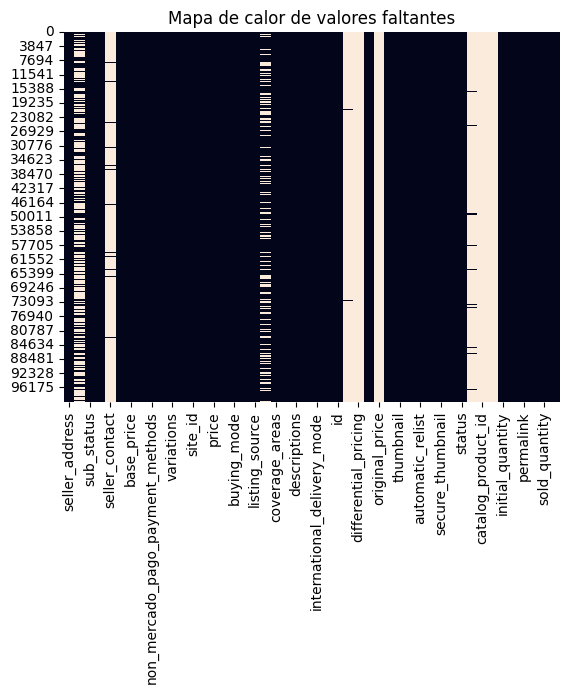

In [35]:
# Revisar valores faltantes
print(df_raw.isnull().sum())

# Visualización de valores faltantes
sns.heatmap(df_raw.isnull(), cbar=False)
plt.title("Mapa de calor de valores faltantes")
plt.show()

Algunas columnas como seller_address y warranty, tienen muchos valores faltantes, lo que podría afectar el análisis y el modelo que se va a construir.

Este mapa de calor muestra que varias columnas tienen bastantes valores faltantes, como seller_address, seller_contact, y parent_item_id. Por lo cual más adelante las vamos a eliminar en el preprocesamiento de datos.

En este paso seleccionamos algunas columnas para eliminar, como identificadores que no nos brindan información relevante y columnas que tienen muchos datos nulos.

In [36]:
columns = ["warranty",
           "seller_contact",
           "deal_ids",
           "seller_id",
           "site_id",
           "listing_type_id",
           "parent_item_id",
           "category_id",
           "id",
           "seller_address",
            "sub_status",
            "variations",
            "location",
            "attributes",
            "tags",
            "listing_source",
            "coverage_areas",
            "international_delivery_mode",
            "pictures",
            "thumbnail",
            "automatic_relist",
            "secure_thumbnail",
            "permalink",
            "geolocation",
            "title",
           "official_store_id",
           "differential_pricing",
           "original_price",
           "currency_id",
           "video_id",
           "shipping",
           "non_mercado_pago_payment_methods",
           "descriptions",
           "catalog_product_id",
           "subtitle"]

df_cleaned = df_raw.drop(columns=(columns))

Revisamos con cuantas filas y columnas nos quedamos.

In [37]:
num_filas, num_columnas = df_cleaned.shape

print(f"el DataFrame tiene {num_filas} filas y {num_columnas} columnas.")

el DataFrame tiene 100000 filas y 13 columnas.


convertimos las columnas de fecha a datetime y luego al formato YYYYMMDD

In [38]:
# Convertir las columnas de fecha a datetime y luego al formato YYYYMMDD
fecha_columnas = ['last_updated', 'date_created', 'start_time', 'stop_time']

for col in fecha_columnas:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col]).dt.strftime('%Y%m%d')

# Mostrar las columnas transformadas
print(df_cleaned[fecha_columnas])

      last_updated date_created start_time stop_time
0         20150905     20150905   20150905  20151104
1         20150926     20150926   20150926  20151125
2         20150909     20150909   20150909  20151108
3         20151005     20150928   20150928  20151204
4         20150828     20150824   20150824  20151023
...            ...          ...        ...       ...
99995     20150928     20150928   20150928  20151127
99996     20150911     20150911   20150911  20151110
99997     20150906     20150906   20150906  20151105
99998     20150818     20150818   20150818  20151017
99999     20150921     20150921   20150921  20151120

[100000 rows x 4 columns]


Observamos las variable numéricas.

In [39]:
numericas = df_cleaned.select_dtypes(include=np.number).columns.tolist()

Verificamos los tipos de datos de cada columna para aplicar One-Hot Encoding a las columnas categóricas.

In [40]:
print(df_cleaned.dtypes)

condition               object
base_price             float64
price                  float64
buying_mode             object
last_updated            object
accepts_mercadopago       bool
date_created            object
stop_time               object
status                  object
initial_quantity         int64
start_time              object
sold_quantity            int64
available_quantity       int64
dtype: object


En este paso verificamos si alguna columna contiene diccionarios o listas.

In [41]:
for col in df_cleaned.select_dtypes(include=['object']).columns:
    print(f"Columna: {col}")
    print(df_raw[col].apply(lambda x: isinstance(x, (dict, list))).value_counts())

Columna: condition
condition
False    100000
Name: count, dtype: int64
Columna: buying_mode
buying_mode
False    100000
Name: count, dtype: int64
Columna: last_updated
last_updated
False    100000
Name: count, dtype: int64
Columna: date_created
date_created
False    100000
Name: count, dtype: int64
Columna: stop_time
stop_time
False    100000
Name: count, dtype: int64
Columna: status
status
False    100000
Name: count, dtype: int64
Columna: start_time
start_time
False    100000
Name: count, dtype: int64


Finlamente aplicamos One-Hot Encoding a todas las columnas categóricas.

In [42]:
numericas = pd.get_dummies(df_cleaned, drop_first=True)

# Mostrar las primeras filas del DataFrame codificado
print(numericas.head())

   base_price   price  accepts_mercadopago  initial_quantity  sold_quantity  \
0        80.0    80.0                 True                 1              0   
1      2650.0  2650.0                 True                 1              0   
2        60.0    60.0                 True                 1              0   
3       580.0   580.0                 True                 1              0   
4        30.0    30.0                 True                 1              0   

   available_quantity  condition_used  buying_mode_buy_it_now  \
0                   1           False                    True   
1                   1            True                    True   
2                   1            True                    True   
3                   1           False                    True   
4                   1            True                    True   

   buying_mode_classified  last_updated_20141113  ...  start_time_20151006  \
0                   False                  False  ...   

En esta parte aplicamos One-Hot Encoding a las columnas categóricas del DataFrame limpio. Ahora tenemos un DataFrame con valores numéricos que incluye las variables codificadas.

Convertir las clases categóricas 'new' y 'used' a valores numéricos (0 - 1).

In [43]:
df_cleaned['condition'] = df_cleaned['condition'].map({'new': 1, 'used': 0})

# Verifica las primeras filas para confirmar
print(df_cleaned[['condition']].head())


   condition
0          1
1          0
2          0
3          1
4          0


Ahora la columna tiene valores binarios que vamos a utilizar para el entrenamiento de modelos.

Calcular la matriz de correlación de las variables numéricas.

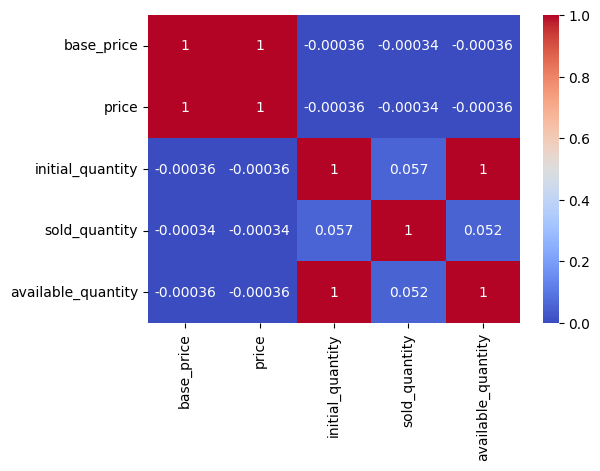

In [44]:
numeric_columns = ['base_price', 'price', 'initial_quantity', 'sold_quantity', 'available_quantity']
correlation_matrix = df_cleaned[numeric_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

La matriz de correlación muestra que no hay relaciones fuertes entre las variables numéricas del conjunto de datos. Las correlaciones entre las variables como initial_quantity, sold_quantity, y available_quantity son muy débiles, con valores cercanos a 0. Esto sugiere que estas variables no están fuertemente relacionadas entre sí, lo que es favorable para el modelo, ya que no hay riesgo significativo de multicolinealidad.

Histograma de las variables numéricas

In [45]:
print(df_cleaned[numeric_columns].head())

   base_price   price  initial_quantity  sold_quantity  available_quantity
0        80.0    80.0                 1              0                   1
1      2650.0  2650.0                 1              0                   1
2        60.0    60.0                 1              0                   1
3       580.0   580.0                 1              0                   1
4        30.0    30.0                 1              0                   1


Crear histogramas para todas las columnas numéricas.

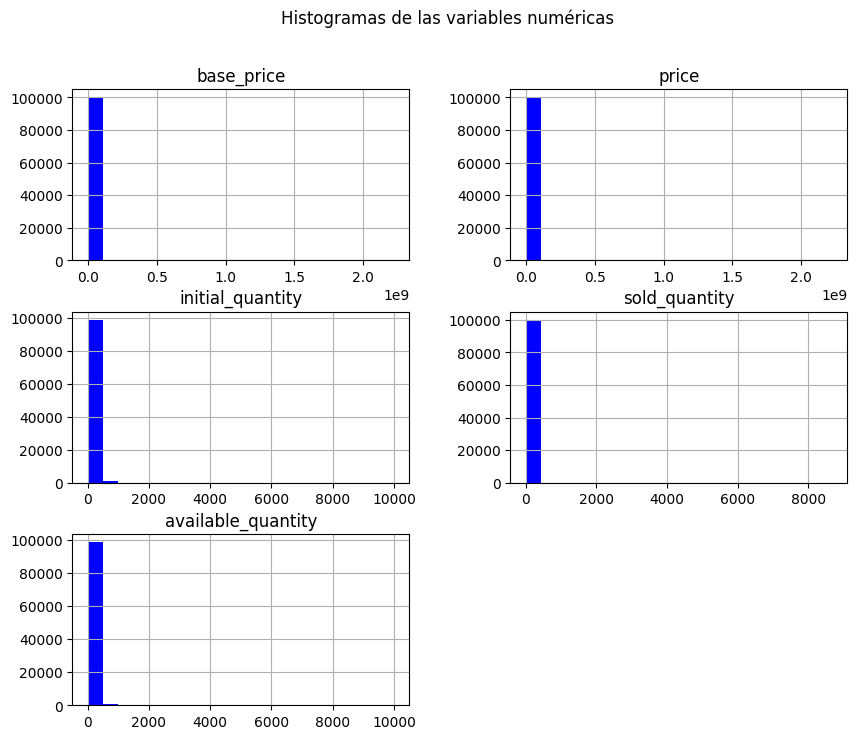

In [46]:
df_cleaned[numeric_columns].hist(bins=20, figsize=(10, 8), color='blue')

# Mostrar los histogramas
plt.suptitle('Histogramas de las variables numéricas')
plt.show()

Los histogramas muestran que las variables numéricas (base_price, price, initial_quantity, sold_quantity, y available_quantity) están concentradas cerca de 0, lo que indica que la mayoría de los valores son bajos. También se observan colas largas hacia valores más altos, lo que sugiere la presencia de outliers (valores extremos). Esto implica que la mayoría de los productos tienen precios bajos y cantidades pequeñas, mientras que solo unos pocos tienen valores excepcionalmente altos.

Definir las variables categóricas

In [47]:
categoricas = df_raw.select_dtypes(include='object').columns.tolist()

print("Variables categóricas:", categoricas)

Variables categóricas: ['seller_address', 'warranty', 'sub_status', 'condition', 'seller_contact', 'deal_ids', 'shipping', 'non_mercado_pago_payment_methods', 'variations', 'location', 'site_id', 'listing_type_id', 'attributes', 'buying_mode', 'tags', 'listing_source', 'parent_item_id', 'coverage_areas', 'category_id', 'descriptions', 'last_updated', 'international_delivery_mode', 'pictures', 'id', 'currency_id', 'thumbnail', 'title', 'date_created', 'secure_thumbnail', 'status', 'video_id', 'permalink', 'geolocation']


Creamos diagramas de dispersión entre los primeros 4 pares de variables numéricas, donde podemos ver algunas relaciones entre precios.

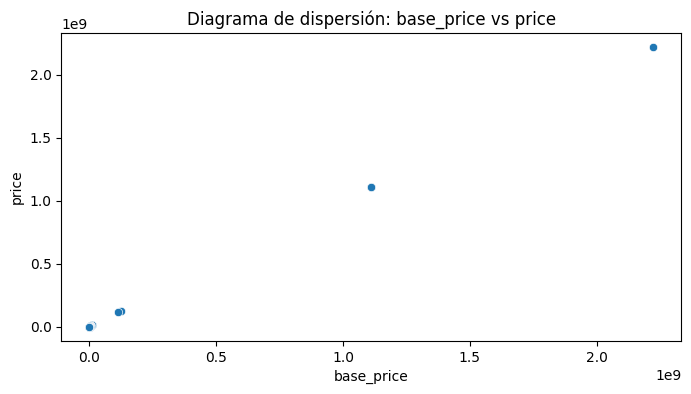

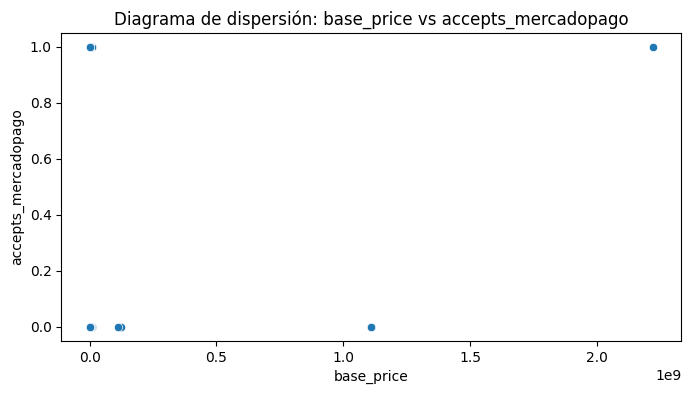

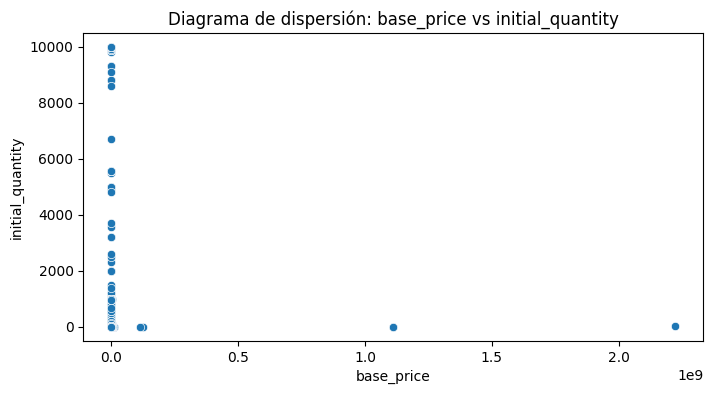

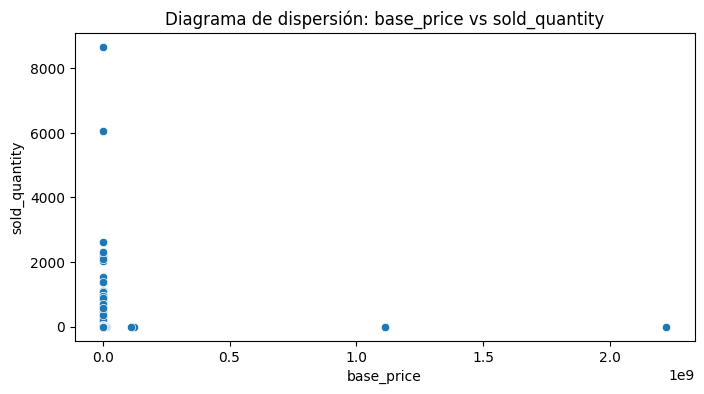

In [49]:
count = 0  # Contador para los gráficos generados

# Iterar sobre las primeras 4 combinaciones de variables numéricas
for i in range(len(numericas.columns)):
    for j in range(i+1, len(numericas.columns)):
        if count < 4:  # Limitar a los primeros 4 gráficos
            plt.figure(figsize=(8, 4))
            sns.scatterplot(x=df_cleaned[numericas.columns[i]], y=df_cleaned[numericas.columns[j]])
            plt.title(f'Diagrama de dispersión: {numericas.columns[i]} vs {numericas.columns[j]}')
            plt.xlabel(numericas.columns[i])
            plt.ylabel(numericas.columns[j])
            plt.show()
            count += 1
        else:
            break

Los gráficos de dispersión muestran que la mayoría de los productos tienen **precios base bajos**, con pocos outliers de precios altos. Existe una **relación clara** entre el **precio base** y el **precio final**, aunque en algunos casos no es proporcional, lo que sugiere descuentos o estrategias de precios diferenciados. Las variables de **cantidad inicial** y **cantidad vendida** muestran que la mayoría de los productos tienen cantidades bajas, sin una correlación fuerte con el precio base, aunque algunos productos más caros también logran vender grandes cantidades.

Creamos otros histogramas para visualizar las tendencias.

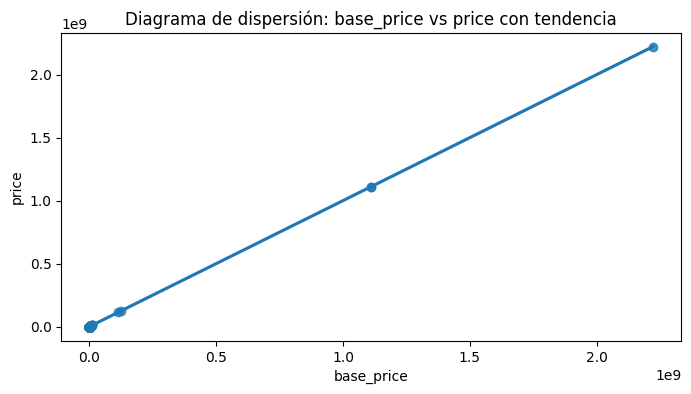

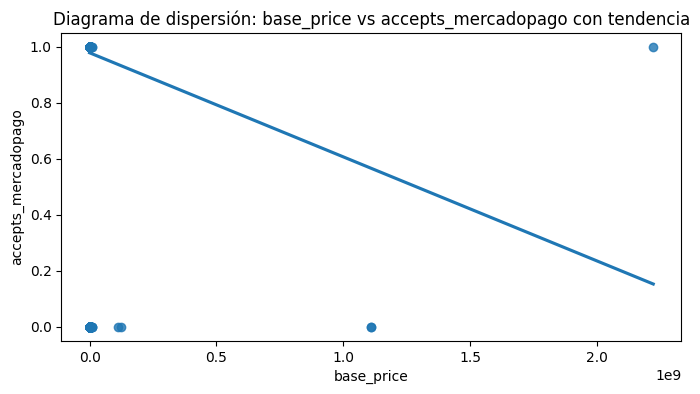

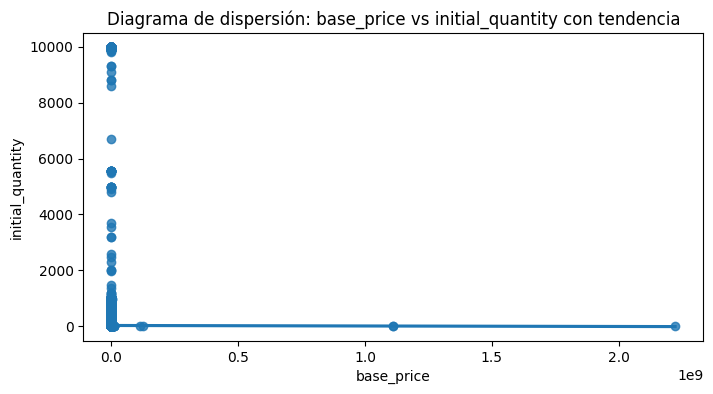

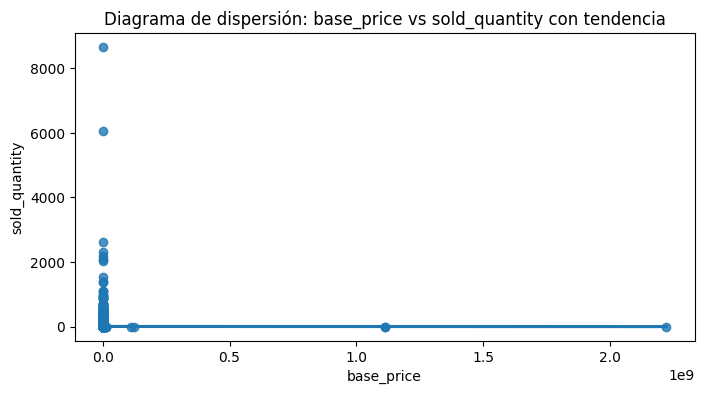

In [51]:
count = 0  # Contador para limitar a 4 gráficos

for i in range(len(numericas.columns)):
    for j in range(i+1, len(numericas.columns)):
        if count < 4:  # Limitar a los primeros 4 gráficos
            plt.figure(figsize=(8, 4))
            sns.regplot(x=df_cleaned[numericas.columns[i]], y=df_cleaned[numericas.columns[j]], ci=None)  # regplot incluye la línea de tendencia
            plt.title(f'Diagrama de dispersión: {numericas.columns[i]} vs {numericas.columns[j]} con tendencia')
            plt.xlabel(numericas.columns[i])
            plt.ylabel(numericas.columns[j])
            plt.show()
            count += 1
        else:
            break

Los gráficos muestran que hay una **relación lineal fuerte** entre el **precio base** y el **precio final**, lo que indica que el precio final aumenta proporcionalmente al precio base. Sin embargo, no se observa una relación clara entre el **precio base** y variables como **accepts_mercadopago**, **initial_quantity**, y **sold_quantity**, ya que no parecen estar correlacionadas de manera significativa. Las cantidades iniciales y vendidas no dependen directamente del precio base, y la aceptación de pagos por MercadoPago tampoco muestra una tendencia clara en relación al precio.

Creamos gráficos de distribución acumulada.

Finalmente guardamos el dataset limpio con las debidas transformaciones.

In [54]:
df_cleaned.to_csv("../data/MLA_100k_clean.csv", index=False)